Heart Attack Analysis

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from scipy.stats import skew, kurtosis
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

1. Age : Age of the patient
2. Sex : Sex of the patient
3. exng: exercise induced angina (1 = yes; 0 = no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
    -Value 1: typical angina
    -Value 2: atypical angina
    -Value 3: non-anginal pain
    -Value 4: asymptomatic
6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral in mg/dl fetched via BMI sensor
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : resting electrocardiographic results
    -Value 0: normal
    -Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
10. thalach : maximum heart rate achieved

In [9]:
df = pd.read_csv("heart.csv")
df.rename({'caa':'ca','thalachh':'thalach'},axis=1, inplace=True) #rename column
df.head()

,age,sex,exng,ca,cp,trtbps,chol,fbs,restecg,thalach,oldpeak
0,63,1,0,0,3,145,233,1,0,150,2.3
1,37,1,0,0,2,130,250,0,1,187,3.5
2,41,0,0,0,1,130,204,0,0,172,1.4
3,56,1,0,0,1,120,236,0,1,178,0.8
4,57,0,1,0,0,120,354,0,1,163,0.6


In [12]:
# Review the dimensions of dataset.
df.shape

(303, 11)

In [16]:
# Review the data types of attributes in your data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   exng     303 non-null    int64  
 3   ca       303 non-null    int64  
 4   cp       303 non-null    int64  
 5   trtbps   303 non-null    int64  
 6   chol     303 non-null    int64  
 7   fbs      303 non-null    int64  
 8   restecg  303 non-null    int64  
 9   thalach  303 non-null    int64  
 10  oldpeak  303 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [20]:
# Summarize the distribution of instances across classes in your dataset.
df.describe()

,age,sex,exng,ca,cp,trtbps,chol,fbs,restecg,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.326733,0.729373,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604
std,9.082101,0.466011,0.469794,1.022606,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075
min,29.000000,0.000000,0.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000
25%,47.500000,0.000000,0.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000
50%,55.000000,1.000000,0.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000
75%,61.000000,1.000000,1.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000
max,77.000000,1.000000,1.000000,4.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000


In [21]:
# Correlations Between Attributes
df.corr()

,age,sex,exng,ca,cp,trtbps,chol,fbs,restecg,thalach,oldpeak
age,1.000000,-0.098447,0.096801,0.276326,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.210013
sex,-0.098447,1.000000,0.141664,0.118261,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.096093
exng,0.096801,0.141664,1.000000,0.115739,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,0.288223
ca,0.276326,0.118261,0.115739,1.000000,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.222682
cp,-0.068653,-0.049353,-0.394280,-0.181053,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.149230
trtbps,0.279351,-0.056769,0.067616,0.101389,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.193216
chol,0.213678,-0.197912,0.067023,0.070511,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.053952
fbs,0.121308,0.045032,0.025665,0.137979,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.005747
restecg,-0.116211,-0.058196,-0.070733,-0.072042,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.058770
thalach,-0.398522,-0.044020,-0.378812,-0.213177,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.344187


Central Tendency
It is measured using 3M's that is mean, median and mode.

1. Mean: It is defined as the average of the values present.
2. Median: It is the centrally located value of the dataset when arranged in ascending order.
3. Mode: It is the most frequent value in the dataset.
   Now the question arises how are these values useful in data analysis of data science. To answer it let us see the following graph.

In [39]:
x = df["age"]
hist_data = [x]
group_labels = ['age'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, show_rug=False)
fig.update_layout(title = "Age Distribution")
fig.show()

print("Mean of age:", df["age"].mean())
print("Median of age:", df["age"].median())
print("Mode of age:", df["age"].mode())
print("Skewness: ", skew(df["age"]))

Mean of age: 54.366336633663366
Median of age: 55.0
Mode of age: 0    58
dtype: int64
Skewness:  -0.2014596901125439


<AxesSubplot:xlabel='age', ylabel='Density'>

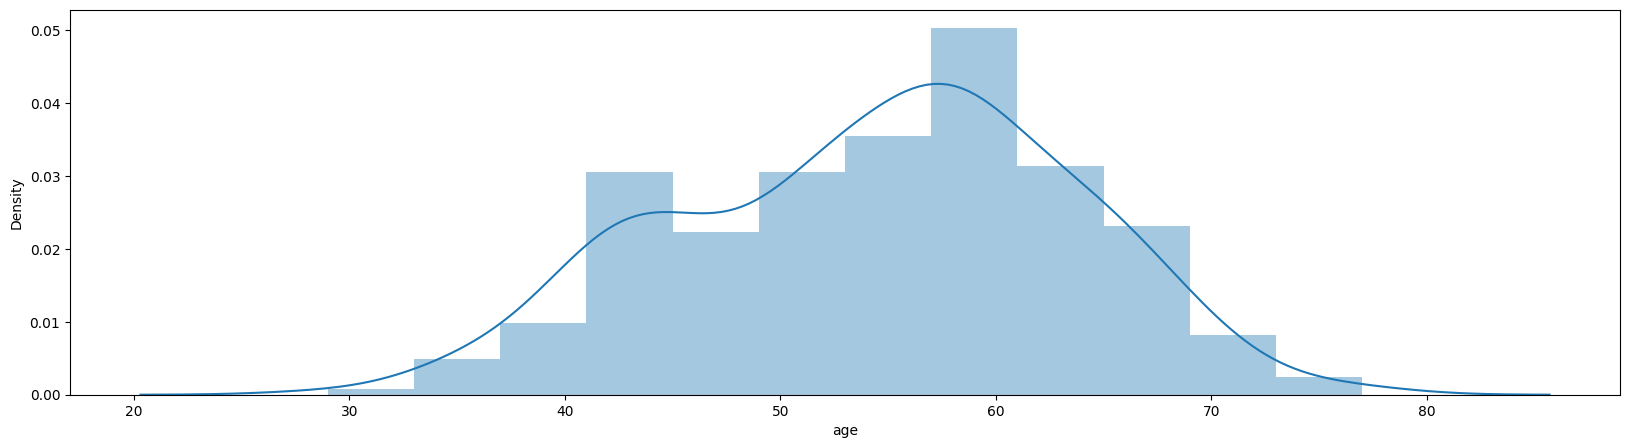

In [65]:
#import warnings
#warnings.filterwarnings("ignore")

# plt.hist(x, bins=40, )
# plt.xlim([25,80])
# plt.rcParams['figure.figsize'] = (20,5 )
sns.distplot(x)